# Bibliotecas

In [1]:
%run libs.py

# Ingest Data

## cargo das

In [2]:
df_DAS = pd.read_csv('data/cargodas.csv.gz', compression='gzip')
df_DAS.shape

(371789, 15)

In [3]:
df_DAS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371789 entries, 0 to 371788
Data columns (total 15 columns):
Unnamed: 0                            371789 non-null int64
Nome                                  371789 non-null object
CPF                                   371789 non-null object
Descrição do cargo emprego            141638 non-null object
Nível de Escolaridade                 371788 non-null object
Situação servidor                     371789 non-null object
Denominação do órgão de atuação       371789 non-null object
UF da UPAG de vinculação              371789 non-null object
Denominação unidade organizacional    371789 non-null object
UF da Residência                      371761 non-null object
Cidade da residência                  371789 non-null object
Data início DAS                       371789 non-null int64
DL nomeação                           365888 non-null object
Valor da DAS                          371789 non-null object
Unnamed: 14                          

In [4]:
df_DAS.sample()

,Unnamed: 0,Nome,CPF,Descrição do cargo emprego,Nível de Escolaridade,Situação servidor,Denominação do órgão de atuação,UF da UPAG de vinculação,Denominação unidade organizacional,UF da Residência,Cidade da residência,Data início DAS,DL nomeação,Valor da DAS,Unnamed: 14
23736,4478,MARCELO MACHADO DE CARVALHO,***638861**,NaN,ENSINO MEDIO,NOMEADO CARGO COMIS.,MINISTERIO DA SAUDE,DF,UNIDADE PAGADORA/DF,DF,BRASILIA,20110822,"PORT 003665/2010, MS PUB: DO 25NOV2010","5440,72",NaN


## df militares

In [5]:
df_militares = pd.read_csv('data/df_militares.csv.gz',compression='gzip')
df_militares.shape

/Users/mattosoerick/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(376678, 44)

In [6]:
df_militares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376678 entries, 0 to 376677
Data columns (total 44 columns):
Unnamed: 0                              376678 non-null int64
Id_SERVIDOR_PORTAL                      376678 non-null int64
NOME                                    376678 non-null object
CPF                                     376678 non-null object
MATRICULA                               376678 non-null object
DESCRICAO_CARGO                         376678 non-null object
CLASSE_CARGO                            376678 non-null int64
REFERENCIA_CARGO                        376678 non-null int64
PADRAO_CARGO                            376678 non-null int64
NIVEL_CARGO                             376678 non-null int64
SIGLA_FUNCAO                            376678 non-null int64
NIVEL_FUNCAO                            376678 non-null int64
FUNCAO                                  376678 non-null object
CODIGO_ATIVIDADE                        376678 non-null int64
ATIVIDADE       

In [7]:
df_militares.sample()

,Unnamed: 0,Id_SERVIDOR_PORTAL,NOME,CPF,MATRICULA,DESCRICAO_CARGO,CLASSE_CARGO,REFERENCIA_CARGO,PADRAO_CARGO,NIVEL_CARGO,SIGLA_FUNCAO,NIVEL_FUNCAO,FUNCAO,CODIGO_ATIVIDADE,ATIVIDADE,OPCAO_PARCIAL,COD_UORG_LOTACAO,UORG_LOTACAO,COD_ORG_LOTACAO,ORG_LOTACAO,COD_ORGSUP_LOTACAO,ORGSUP_LOTACAO,COD_UORG_EXERCICIO,UORG_EXERCICIO,COD_ORG_EXERCICIO,ORG_EXERCICIO,COD_ORGSUP_EXERCICIO,ORGSUP_EXERCICIO,TIPO_VINCULO,SITUACAO_VINCULO,DATA_INICIO_AFASTAMENTO,DATA_TERMINO_AFASTAMENTO,REGIME_JURIDICO,JORNADA_DE_TRABALHO,DATA_INGRESSO_CARGOFUNCAO,DATA_NOMEACAO_CARGOFUNCAO,DATA_INGRESSO_ORGAO,DOCUMENTO_INGRESSO_SERVICOPUBLICO,DATA_DIPLOMA_INGRESSO_SERVICOPUBLICO,DIPLOMA_INGRESSO_CARGOFUNCAO,DIPLOMA_INGRESSO_ORGAO,DIPLOMA_INGRESSO_SERVICOPUBLICO,UF_EXERCICIO,file
372123,372123,6810281,WILLIAM TENORIO DOS SANTOS,***.686.087-**,059****,Soldado,0,0,0,0,-1,-1,Sem informação,-1,Sem informação,NaN,-1,Sem informação,16000,Comando do Exército,40105,Ministério da Defesa,-1,Sem informação,16000,Comando do Exército,40105,Ministério da Defesa,2,MILITAR DA ATIVA,NaN,NaN,ESTATUTO DOS MILITARES,DSPN. PERMANENTE,NaN,NaN,NaN,001,NaN,NaN,Sem informação,BOLETIM INTERNO,-1,201505


# Merge

In [8]:
print('df_militares', df_militares.shape)
print('df_DAS', df_DAS.shape)

df_militares (376678, 44)
df_DAS (371789, 15)


In [9]:
df_militares['unique_id'] = df_militares['NOME'] + \
    df_militares['CPF'].str.replace('[.-]', '', regex=True)
df_DAS['unique_id'] = df_DAS['Nome'] + \
    df_DAS['CPF'].str.replace('[.-]', '', regex=True)

![Figure 1-1](http://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png "Figure 1-1")

Vamos juntar as tabelas de Militares e DAS em uma só usando a propriedade 'INNER' para garantir que temos somente os militares em cargos DAS. Mas para isso precisamos criar uma chave única formada por nome do servidor + CPF.

In [10]:
df_DAS_mil = pd.merge(df_DAS, df_militares, how='inner', on='unique_id')
print('df_DAS_mil', df_DAS_mil.shape)

df_DAS_mil (6497, 60)


In [11]:
df_DAS_mil.sample()

,Unnamed: 0_x,Nome,CPF_x,Descrição do cargo emprego,Nível de Escolaridade,Situação servidor,Denominação do órgão de atuação,UF da UPAG de vinculação,Denominação unidade organizacional,UF da Residência,Cidade da residência,Data início DAS,DL nomeação,Valor da DAS,Unnamed: 14,unique_id,Unnamed: 0_y,Id_SERVIDOR_PORTAL,NOME,CPF_y,MATRICULA,DESCRICAO_CARGO,CLASSE_CARGO,REFERENCIA_CARGO,PADRAO_CARGO,NIVEL_CARGO,SIGLA_FUNCAO,NIVEL_FUNCAO,FUNCAO,CODIGO_ATIVIDADE,ATIVIDADE,OPCAO_PARCIAL,COD_UORG_LOTACAO,UORG_LOTACAO,COD_ORG_LOTACAO,ORG_LOTACAO,COD_ORGSUP_LOTACAO,ORGSUP_LOTACAO,COD_UORG_EXERCICIO,UORG_EXERCICIO,COD_ORG_EXERCICIO,ORG_EXERCICIO,COD_ORGSUP_EXERCICIO,ORGSUP_EXERCICIO,TIPO_VINCULO,SITUACAO_VINCULO,DATA_INICIO_AFASTAMENTO,DATA_TERMINO_AFASTAMENTO,REGIME_JURIDICO,JORNADA_DE_TRABALHO,DATA_INGRESSO_CARGOFUNCAO,DATA_NOMEACAO_CARGOFUNCAO,DATA_INGRESSO_ORGAO,DOCUMENTO_INGRESSO_SERVICOPUBLICO,DATA_DIPLOMA_INGRESSO_SERVICOPUBLICO,DIPLOMA_INGRESSO_CARGOFUNCAO,DIPLOMA_INGRESSO_ORGAO,DIPLOMA_INGRESSO_SERVICOPUBLICO,UF_EXERCICIO,file
5189,6834,ADILSON LOPES DE FARIA,***579096**,NaN,ENSINO SUPERIOR,REQ. MILITAR F. ARM,COMANDO DA AERONAUTICA,DF,GERENCIA DE GESTAO DE PESSOAS,DF,BRASILIA,20170703,"PORT 2567/SEPESD/SG/MD, 28JUN2017, DOU 123 29J...",0,NaN,ADILSON LOPES DE FARIA***579096**,2493,8510982,ADILSON LOPES DE FARIA,***.579.096-**,020****,Suboficial,0,0,0,0,-1,-1,Sem informação,-1,Sem informação,NaN,-1,Sem informação,21000,Comando da Aeronáutica,40105,Ministério da Defesa,-1,Sem informação,21000,Comando da Aeronáutica,40105,Ministério da Defesa,2,MILITAR DA ATIVA,NaN,NaN,ESTATUTO DOS MILITARES,DSPN. PERMANENTE,NaN,NaN,NaN,NaN,NaN,NaN,Sem informação,PORTARIA,-1,201505


In [12]:
df_militares_no_governo = df_DAS_mil[[
    'Nome', 'CPF_x', 'ORG_EXERCICIO','ORG_LOTACAO','DESCRICAO_CARGO','Descrição do cargo emprego', 'Situação servidor',
    'Denominação do órgão de atuação', 'UF da UPAG de vinculação',
    'Denominação unidade organizacional', 'UF da Residência',
    'Cidade da residência', 'Data início DAS', 'DL nomeação', 'Valor da DAS',
    'unique_id', 'Id_SERVIDOR_PORTAL', 'MATRICULA',
    'UF_EXERCICIO', 'file'
]]

In [13]:
df_militares_no_governo['DESCRICAO_CARGO'].value_counts()

Coronel                                 1158
Segundo-Sargento                         810
Primeiro-Tenente                         737
Tenente-Coronel                          479
Segundo-Tenente                          369
Suboficial                               315
Terceiro-Sargento                        309
Primeiro-Sargento                        277
Cabo (engajado)                          245
Capitao-de-Mar-e-Guerra                  236
Capitao                                  201
Major                                    194
General-de-Brigada                       162
General-de-Divisao                       157
Brigadeiro                               134
Subtenente                               122
Contra-Almirante                          93
Soldado                                   78
Tenente-Brigadeiro-do-Ar                  77
Capitao-de-Fragata                        71
General-de-Exercito                       56
Vice-Almirante                            46
Major-Brig

In [14]:
filter_ = 'Soldado'
df_oficiais_no_governo = df_militares_no_governo[~(
    df_militares_no_governo['DESCRICAO_CARGO'].str.contains(filter_))]

# Ajustando strings

In [15]:
col = 'Denominação do órgão de atuação'
df_oficiais_no_governo[col] = df_oficiais_no_governo[col].str.replace(
    ('.*' + 'JUSTI.*A' + '.*'), ('MINISTERIO DA JUSTIÇA'), regex=True)
df_oficiais_no_governo[col] = df_oficiais_no_governo[col].str.replace(
    ('.*' + 'ESTADOS.*MUNICIPIOS' + '.*'), ('ESTADOS/MUNICIPIOS/ADM.DIR-AUT/FUNDACOES'), regex=True)
df_oficiais_no_governo[col] = df_oficiais_no_governo[col].str.replace(
    ('.*' + 'MINIST.DA CI' + '.*'), ('MINISTÉRIO CIÊNCIA TEC.INOV.COMUNICAÇÕES'), regex=True)
df_oficiais_no_governo[col] = df_oficiais_no_governo[col].str.replace(
    ('.*' + 'HUMANOS' + '.*'), ('MINISTERIO DOS DIREITOS HUMANOS'), regex=True)

/Users/mattosoerick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mattosoerick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/mattosoerick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [16]:
col = 'Cidade da residência'
df_oficiais_no_governo[col] = df_oficiais_no_governo[col].str.replace(
    ('.*BRAS.*A$'), ('BRASILIA'))
df_oficiais_no_governo[col] = df_oficiais_no_governo[col].str.replace(
    ('GRAVATAI - RS'), ('GRAVATAI'))
df_oficiais_no_governo[col] = df_oficiais_no_governo[col].str.replace(
    ('RJ$'), ('RIO DE JANEIRO'))
df_oficiais_no_governo[col] = df_oficiais_no_governo[col].str.replace(
    ('.*TAGUATING.*'), ('TAGUATINGUA'))
df_oficiais_no_governo['endereço'] = (
    df_oficiais_no_governo[col]+' - '+df_oficiais_no_governo['UF da Residência'])

/Users/mattosoerick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mattosoerick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/mattosoerick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [17]:
col = 'Data início DAS'
df_oficiais_no_governo[col] = pd.to_datetime(
    df_oficiais_no_governo[col], format="%Y%m%d")
df_oficiais_no_governo2 = df_oficiais_no_governo[(
    df_oficiais_no_governo[col] > '2018-12-31') & (df_oficiais_no_governo[col] < '2021-01-01')]

/Users/mattosoerick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
col = 'Valor da DAS'
df_oficiais_no_governo[col] = df_oficiais_no_governo[col].str.replace((','),('.'))
df_oficiais_no_governo[col] = df_oficiais_no_governo[col].astype(float)

/Users/mattosoerick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mattosoerick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# fim

In [19]:
df_oficiais_no_governo = df_oficiais_no_governo.drop_duplicates()

In [20]:
Dilma_Rousseff = (df_oficiais_no_governo['Data início DAS'] >=
                  '2011-01-01') & (df_oficiais_no_governo['Data início DAS'] < '2016-08-31')
Michel_Temer = (df_oficiais_no_governo['Data início DAS'] >=
                '2016-08-01') & (df_oficiais_no_governo['Data início DAS'] < '2019-01-01')
Jair_Bolsonaro = (df_oficiais_no_governo['Data início DAS'] >=
                  '2019-01-01') & (df_oficiais_no_governo['Data início DAS'] < '2022-01-01')

df_oficiais_no_governo.loc[Dilma_Rousseff, 'presidente'] = 'Dilma Rousseff'
df_oficiais_no_governo.loc[Michel_Temer, 'presidente'] = 'Michel Temer'
df_oficiais_no_governo.loc[Jair_Bolsonaro, 'presidente'] = 'Jair Bolsonaro'

df_oficiais_no_governo.head()

,Nome,CPF_x,ORG_EXERCICIO,ORG_LOTACAO,DESCRICAO_CARGO,Descrição do cargo emprego,Situação servidor,Denominação do órgão de atuação,UF da UPAG de vinculação,Denominação unidade organizacional,UF da Residência,Cidade da residência,Data início DAS,DL nomeação,Valor da DAS,unique_id,Id_SERVIDOR_PORTAL,MATRICULA,UF_EXERCICIO,file,endereço,presidente
0,IVO BARBOSA LEITE,***035598**,Comando da Marinha,Comando da Marinha,Suboficial,NaN,NOMEADO CARGO COMIS.,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",DF,COORD GERAL ADM DE PESSOAS,GO,AGUAS LINDAS DE GOIAS,2019-03-13,"PORT 001166/2019, SE PUB: DO 13MAR2019",5685.55,IVO BARBOSA LEITE***035598**,213879,057****,-1,201505,AGUAS LINDAS DE GOIAS - GO,Jair Bolsonaro
1,IVO BARBOSA LEITE,***035598**,Comando da Marinha,Comando da Marinha,Suboficial,NaN,NOMEADO CARGO COMIS.,MINISTERIO DA JUSTIÇA,DF,MJ/SE/SAA/CGGP,GO,AGUAS LINDAS DE GOIAS,2019-01-03,"PORT 000022/2019, SE PUB: DO 03JAN2019",10719.07,IVO BARBOSA LEITE***035598**,213879,057****,-1,201505,AGUAS LINDAS DE GOIAS - GO,Jair Bolsonaro
2,IVO BARBOSA LEITE,***035598**,Comando da Marinha,Comando da Marinha,Suboficial,NaN,NOMEADO CARGO COMIS.,MINISTERIO DA DEFESA,DF,GERENCIA DE GESTAO DE PESSOAS,DF,BRASILIA,2017-03-07,"PORT 000782/2017, DEADI PUB: DO 07MAR2017",5440.72,IVO BARBOSA LEITE***035598**,213879,057****,-1,201505,BRASILIA - DF,Michel Temer
3,IVO BARBOSA LEITE,***035598**,Comando da Marinha,Comando da Marinha,Suboficial,NaN,NOMEADO CARGO COMIS.,MINISTERIO DA JUSTIÇA,DF,MJ/SE/SAA/CGGP,DF,BRASILIA,2018-05-22,PORTARIA Nº181/CASA CIVIL DOU 22MAI2018,9926.60,IVO BARBOSA LEITE***035598**,213879,057****,-1,201505,BRASILIA - DF,Michel Temer
4,IVO BARBOSA LEITE,***035598**,Comando da Marinha,Comando da Marinha,Suboficial,NaN,NOMEADO CARGO COMIS.,MINISTERIO DA DEFESA,DF,GERENCIA DE GESTAO DE PESSOAS,DF,BRASILIA,2017-03-07,"PORT 000782/2017, DEADI PUB: DO 07MAR2017",5194.01,IVO BARBOSA LEITE***035598**,213879,057****,-1,201505,BRASILIA - DF,Michel Temer


/Users/mattosoerick/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


presidente
Dilma Rousseff     136
Jair Bolsonaro     873
Michel Temer      1030
Name: Nome, dtype: int64


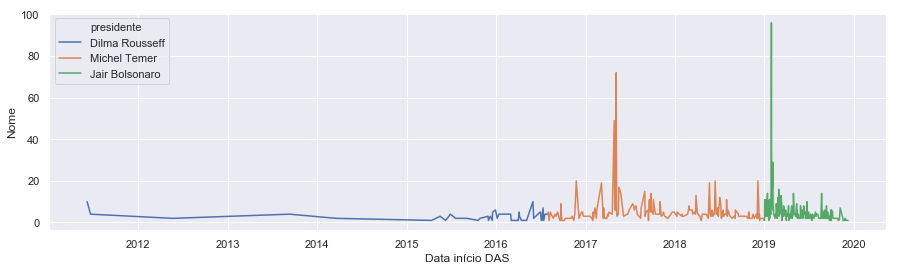

In [21]:
sns.set()
plot_df = pd.DataFrame(
    df_oficiais_no_governo.groupby(['Data início DAS',
                   'presidente'])['unique_id'].count()).reset_index()
plt.figure(figsize=(15, 4))
sns.lineplot(x='Data início DAS',
             y='Nome',
             hue="presidente",
             markers="o",
             data=plot_df)
print(df_oficiais_no_governo.groupby(['presidente'])['unique_id'].count())

In [22]:
Jair_Bolsonaro = (df_oficiais_no_governo['Data início DAS'] >= '2019-01-01') & (df_oficiais_no_governo['Data início DAS'] < '2022-01-01')
df_oficiais_bolsonaro = df_oficiais_no_governo[Jair_Bolsonaro]

In [23]:
from key_google import *

df_oficiais_bolsonaro['endereço'] = (df_oficiais_bolsonaro['Cidade da residência']+' - '+df_oficiais_bolsonaro['UF da Residência'])

for address in df_oficiais_bolsonaro['endereço']:   
    gmaps = googlemaps.Client(key=key)
    try:
        geocode_result = gmaps.geocode(address)
        lat = geocode_result[0]['geometry']['location']['lat']
        lng = geocode_result[0]['geometry']['location']['lng']
        
        df_oficiais_bolsonaro.loc[df_oficiais_bolsonaro['endereço']==address,'lat'] = lat
        df_oficiais_bolsonaro.loc[df_oficiais_bolsonaro['endereço']==address,'lng'] = lng
    except:
        pass

/Users/mattosoerick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mattosoerick/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/mattosoerick/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [24]:
da

In [25]:
# Save to a compress format
df_oficiais_bolsonaro.to_csv('data/df_cc.csv.gz', compression='gzip')